In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
df = pd.read_csv('telecom_churn.csv')

In [3]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
print(df.shape)

(3333, 20)


In [5]:
df.columns.values

array(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'], dtype=object)

In [6]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [7]:
df.isnull().values.any()

False

In [8]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [9]:
df['Churn'] = df['Churn'].astype('int64')

In [10]:
df['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [11]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [12]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [13]:
df.Churn.mean()

0.14491449144914492

In [14]:
df.sort_values(by="Total day charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


In [15]:
df = df.replace({'Yes': 1, 'No': 0})

In [16]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                        Total eve minutes             \
                   mean        std amin   amax              mean        std   
Churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
       amin   amax                mean        std  amin   amax  
Churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

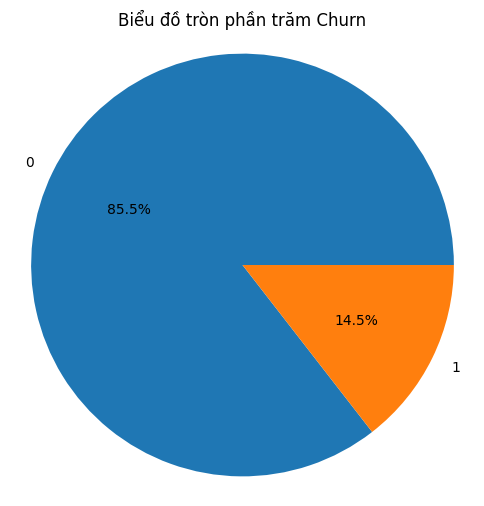

In [17]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels = churn_counts.index, autopct= '%1.1f%%')
plt.axis('equal')
plt.title('Biểu đồ tròn phần trăm Churn')
plt.show()

<Axes: xlabel='International plan', ylabel='count'>

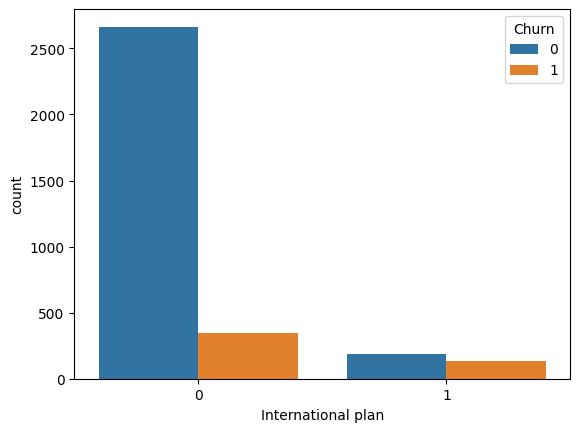

In [18]:
sns.countplot(x='International plan', hue='Churn', data=df)

In [19]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan,0,1,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


<Axes: xlabel='Area code', ylabel='count'>

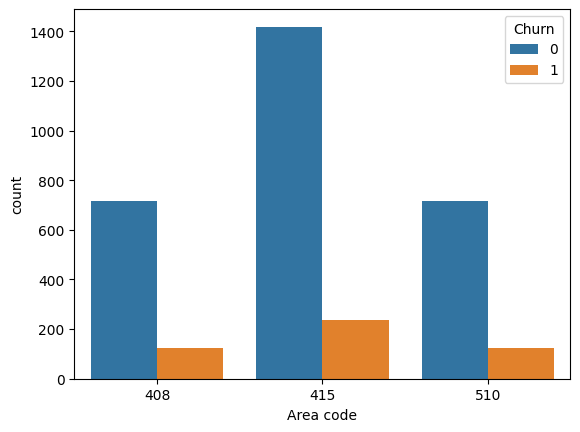

In [20]:
sns.countplot(x='Area code', hue='Churn', data=df)

In [21]:
pd.crosstab(df["Churn"], df["Area code"], margins=True)

Area code,408,415,510,All
Churn,,,,
0,716,1419,715,2850
1,122,236,125,483
All,838,1655,840,3333


<Axes: xlabel='Voice mail plan', ylabel='count'>

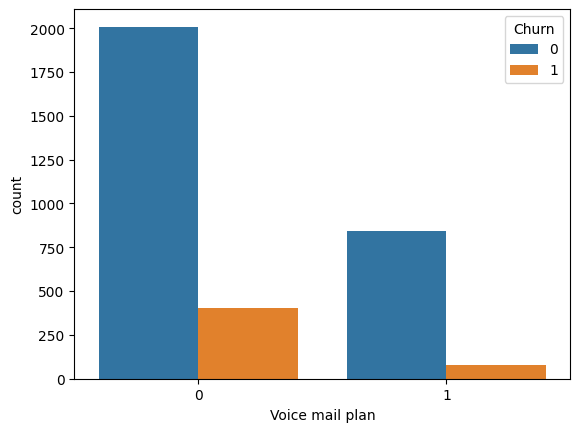

In [22]:
sns.countplot(x='Voice mail plan', hue='Churn', data=df)

In [23]:
pd.crosstab(df["Churn"], df["Voice mail plan"], margins=True)

Voice mail plan,0,1,All
Churn,,,
0,2008,842,2850
1,403,80,483
All,2411,922,3333


<Axes: xlabel='Customer service calls', ylabel='count'>

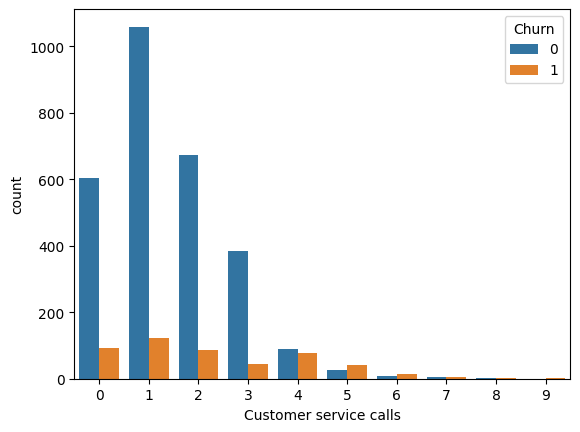

In [24]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)

In [25]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


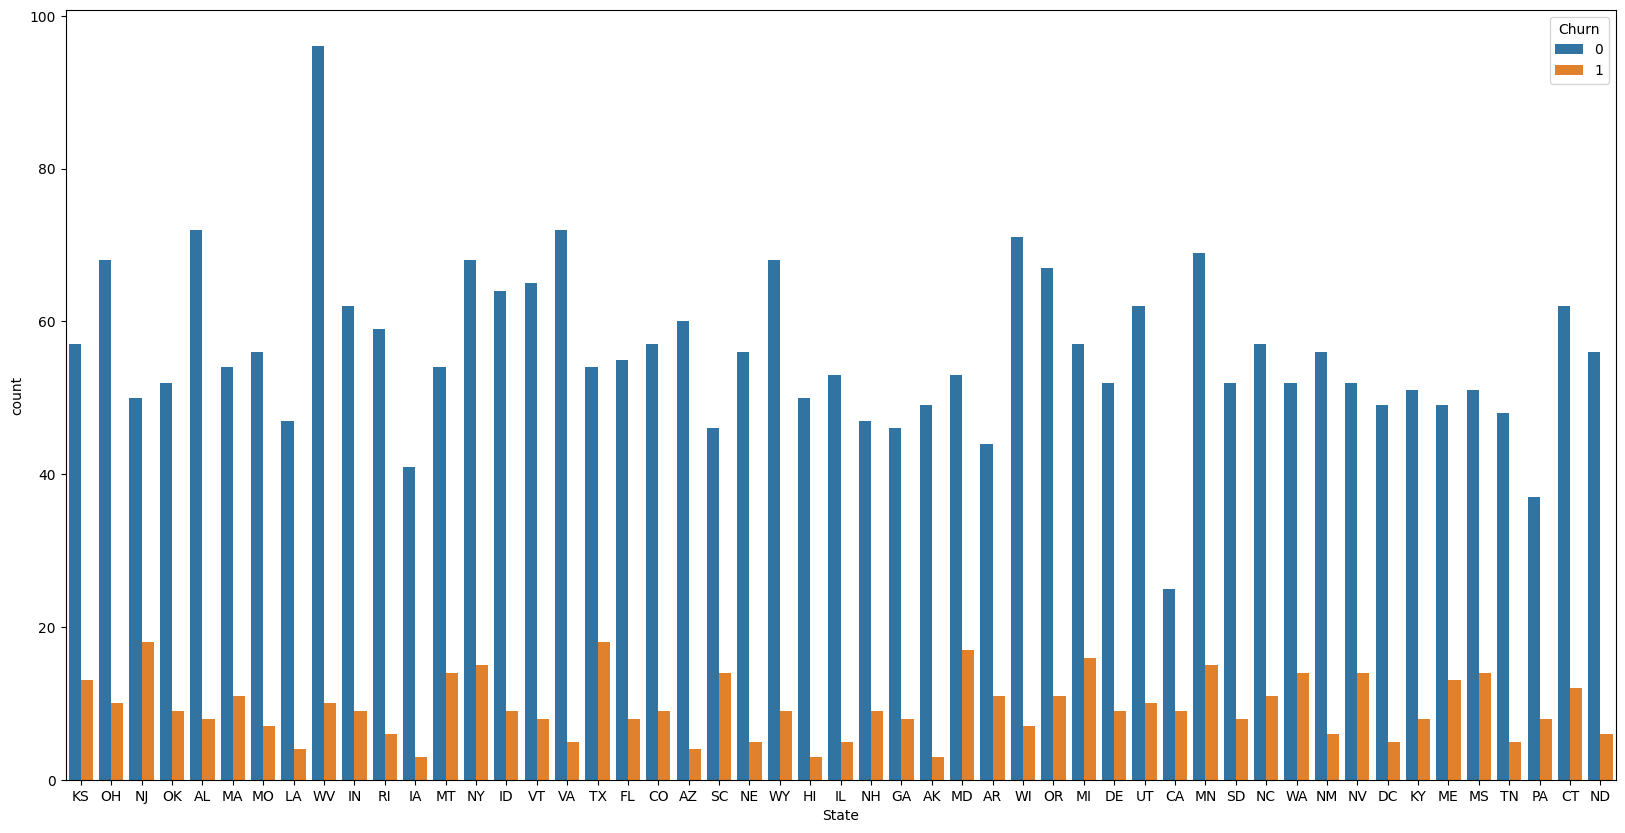

In [26]:
plt.figure(figsize=(20, 10))
sns.countplot(x='State', hue='Churn', data=df)
plt.show()

In [27]:
pd.crosstab(df["Churn"], df["State"], margins=True)

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,All
Churn,,,,,,,,,,,,,,,,,,,,,
0,49,72,44,60,25,57,62,49,52,55,...,48,54,62,72,65,52,71,96,68,2850
1,3,8,11,4,9,9,12,5,9,8,...,5,18,10,5,8,14,7,10,9,483
All,52,80,55,64,34,66,74,54,61,63,...,53,72,72,77,73,66,78,106,77,3333


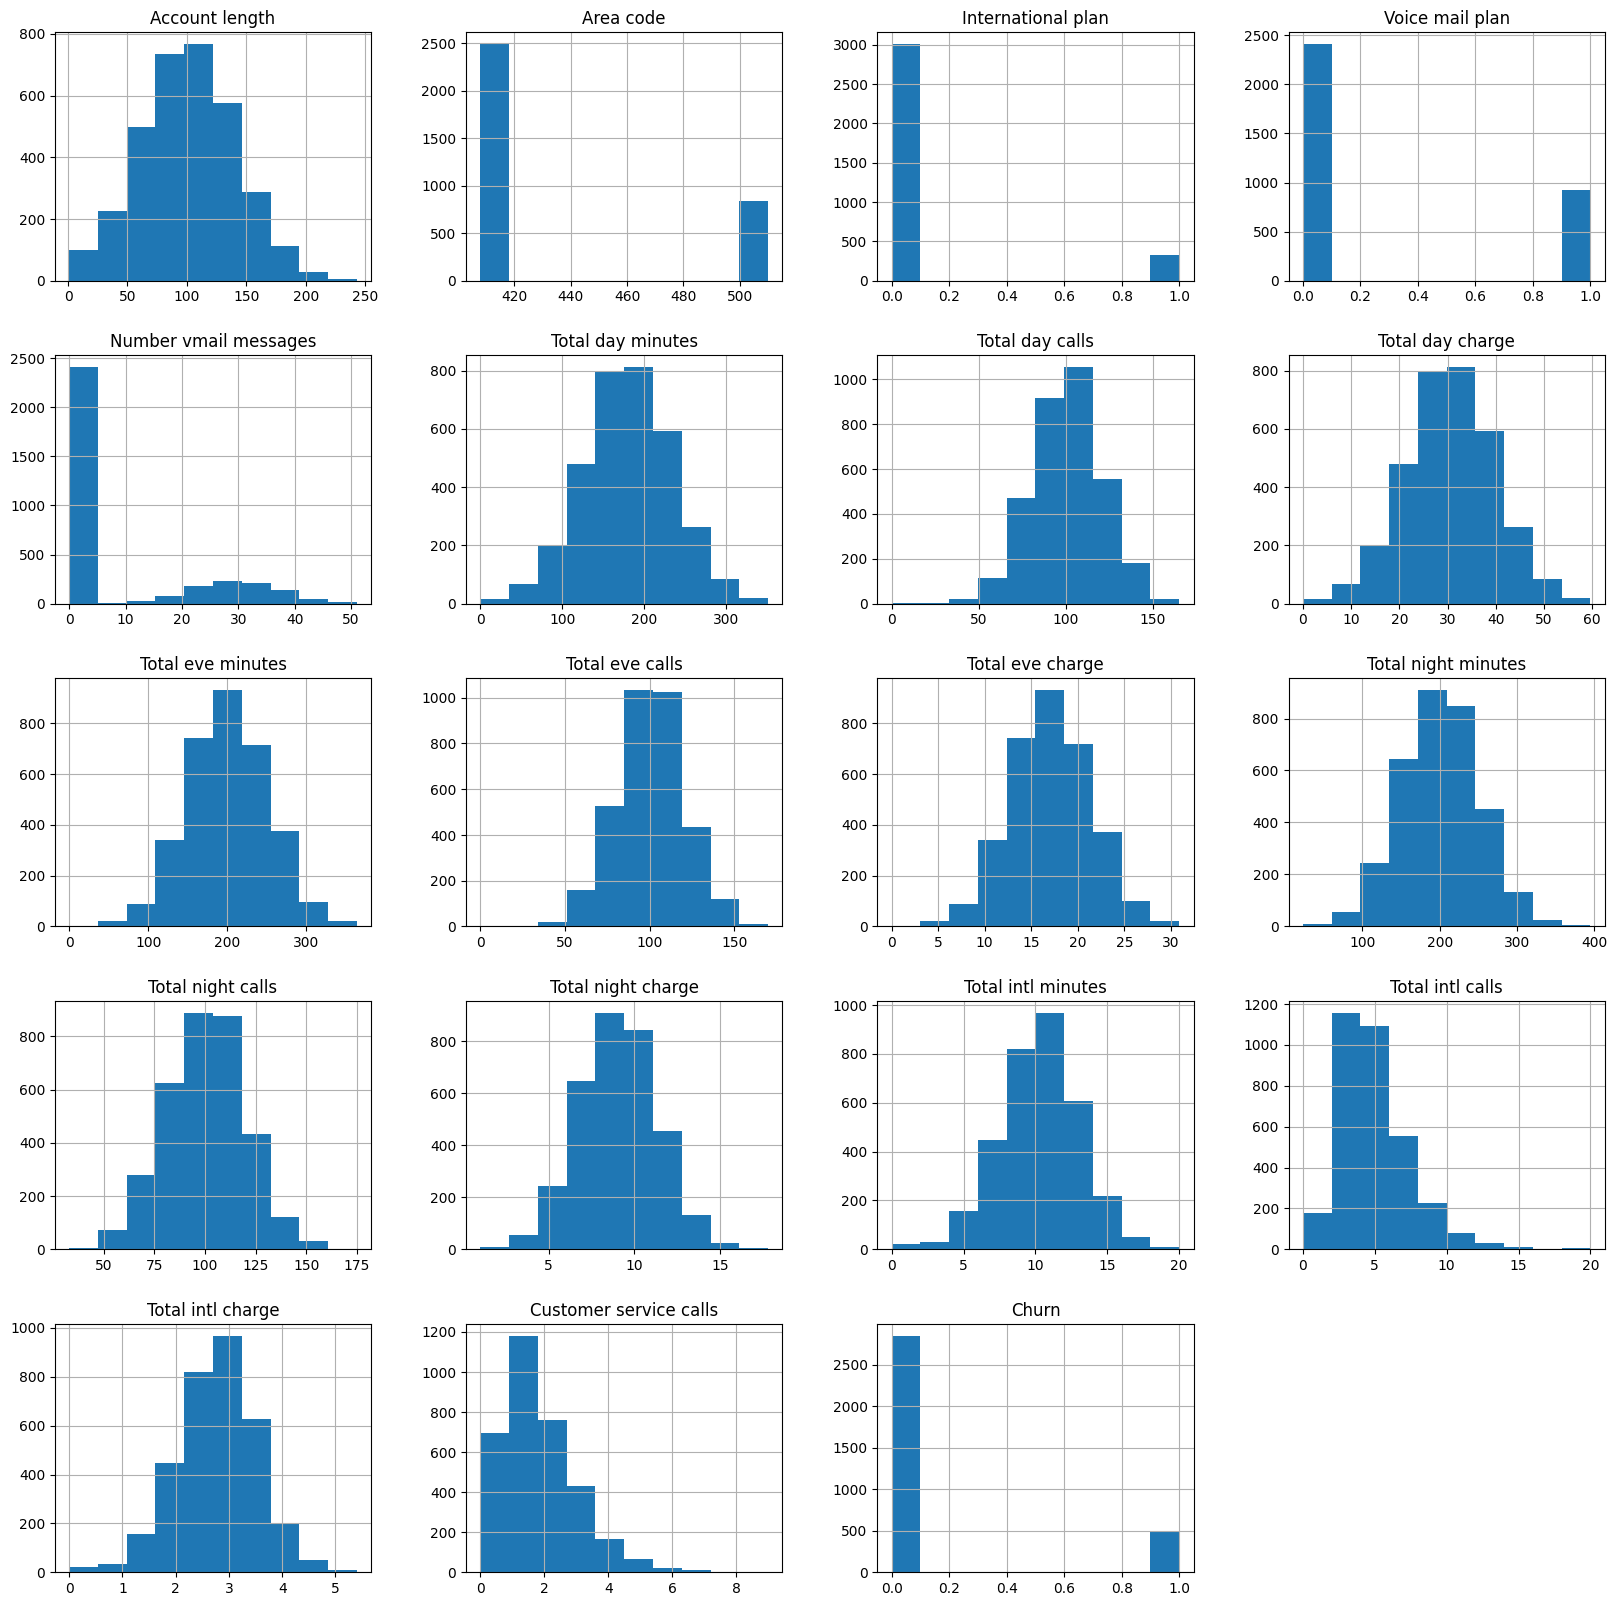

In [28]:
df.hist(figsize=(20,20));

In [29]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

print(df.dtypes)

State                       int32
Account length              int64
Area code                   int64
International plan          int64
Voice mail plan             int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object


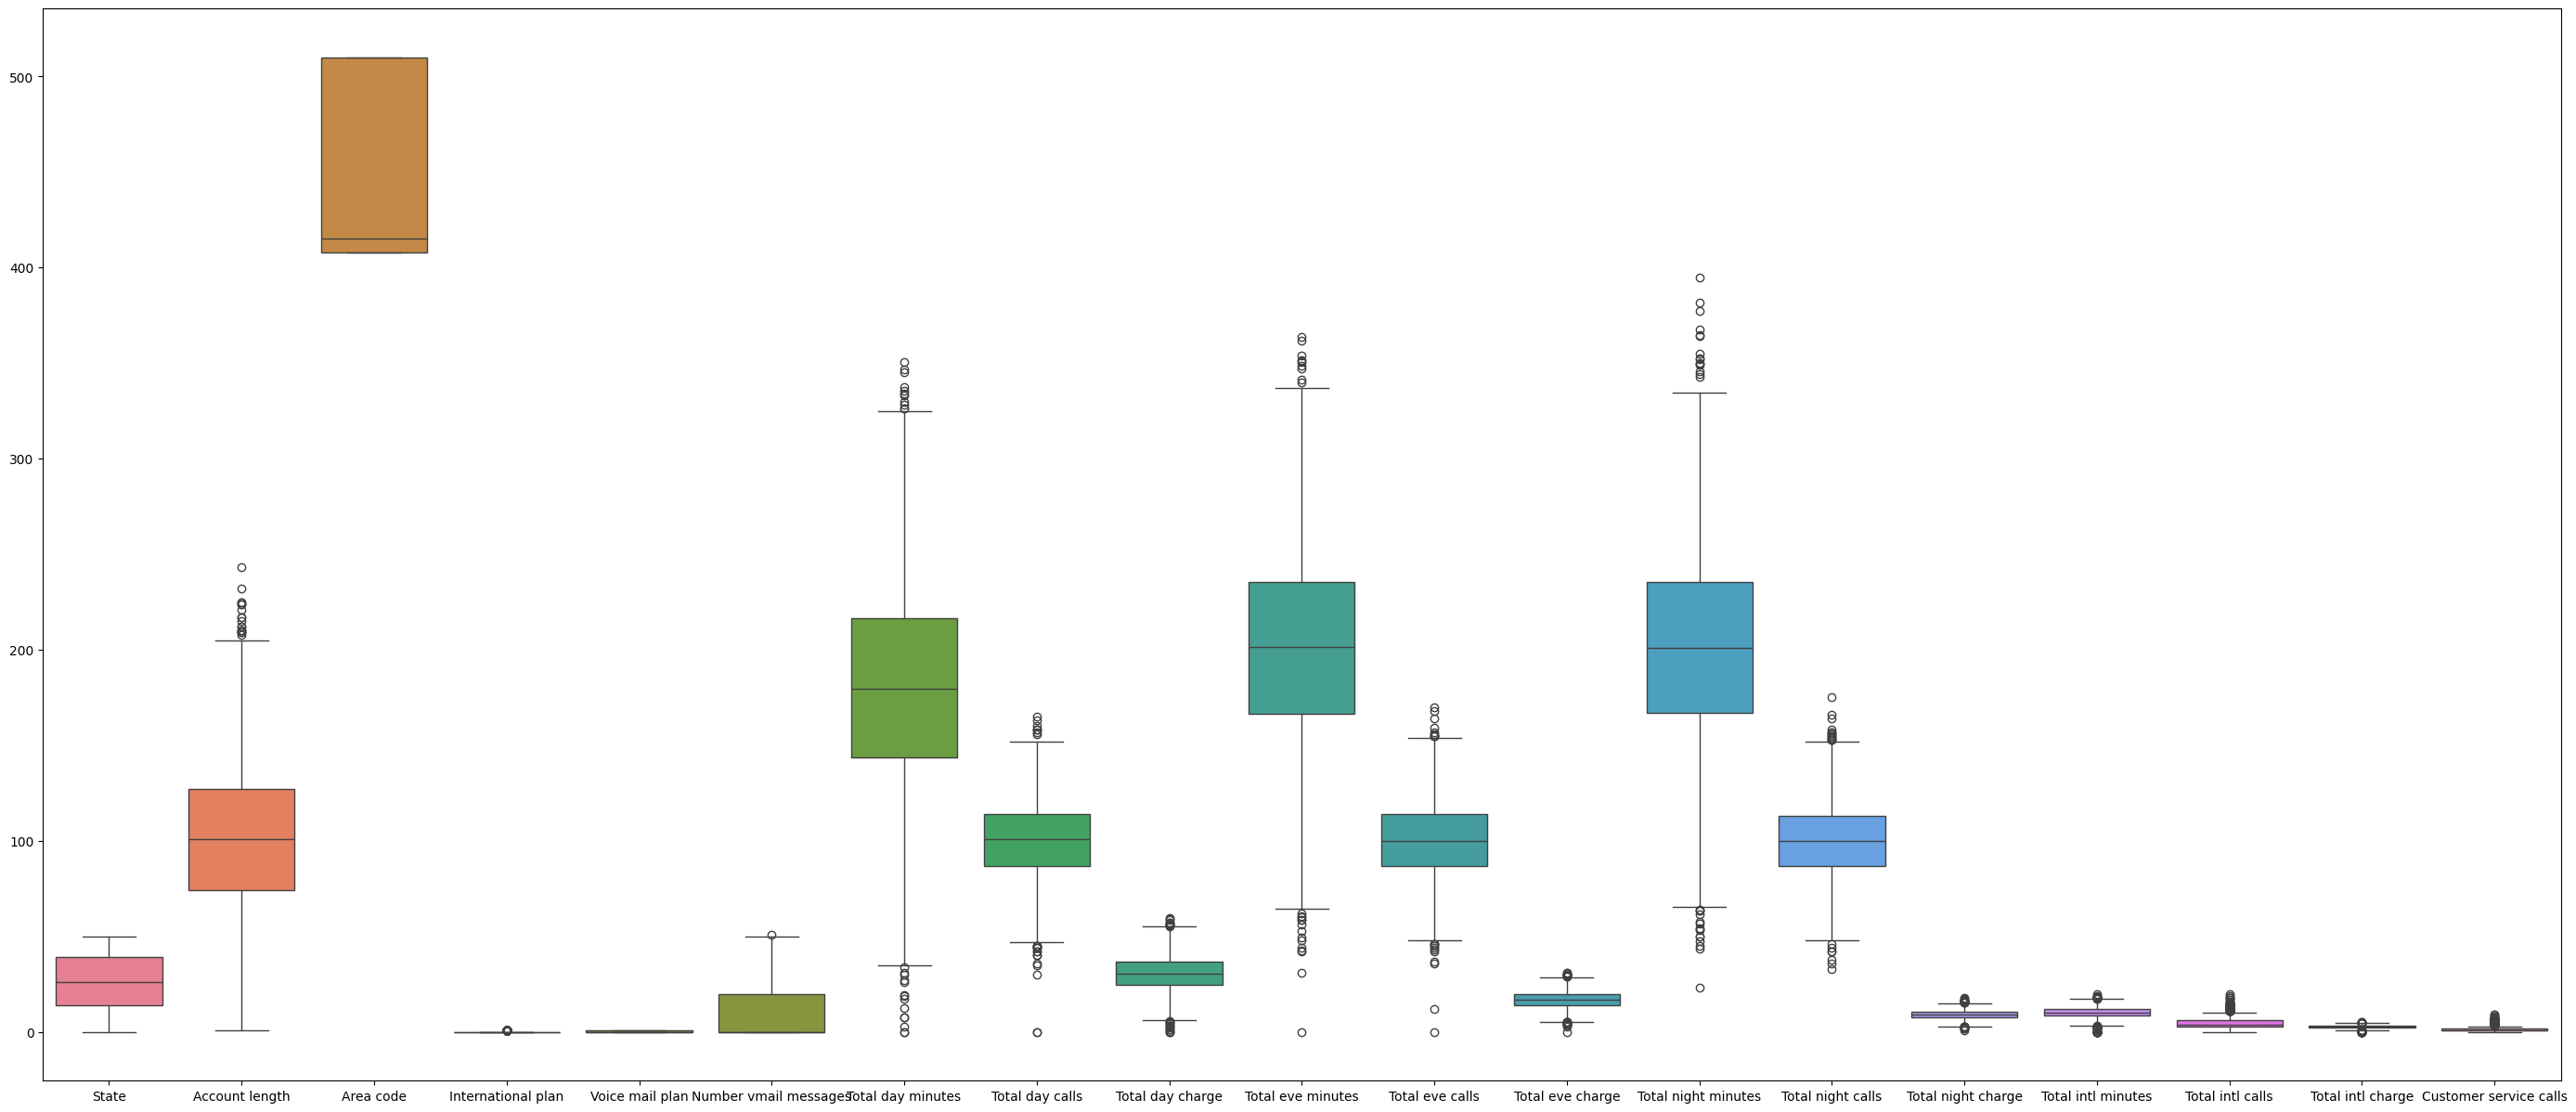

In [30]:
plt.figure(figsize=(35,15))
sns.boxplot(df.iloc[:,:-1])
plt.show();

In [31]:
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound,upper_bound

for column in df[['Account length','International plan','Number vmail messages','Total day minutes','Total day calls',
                  'Total day calls','Total day charge', 'Total eve minutes','Total eve calls','Total eve charge',
                  'Total night minutes','Total night calls','Total night charge','Total intl minutes',
                  'Total intl calls','Total intl charge','Customer service calls']]:
    lb,ub = remove_outliers(df[column])
    df[column] = np.where(df[column] > ub, ub, df[column])
    df[column] = np.where(df[column] < lb, lb, df[column])



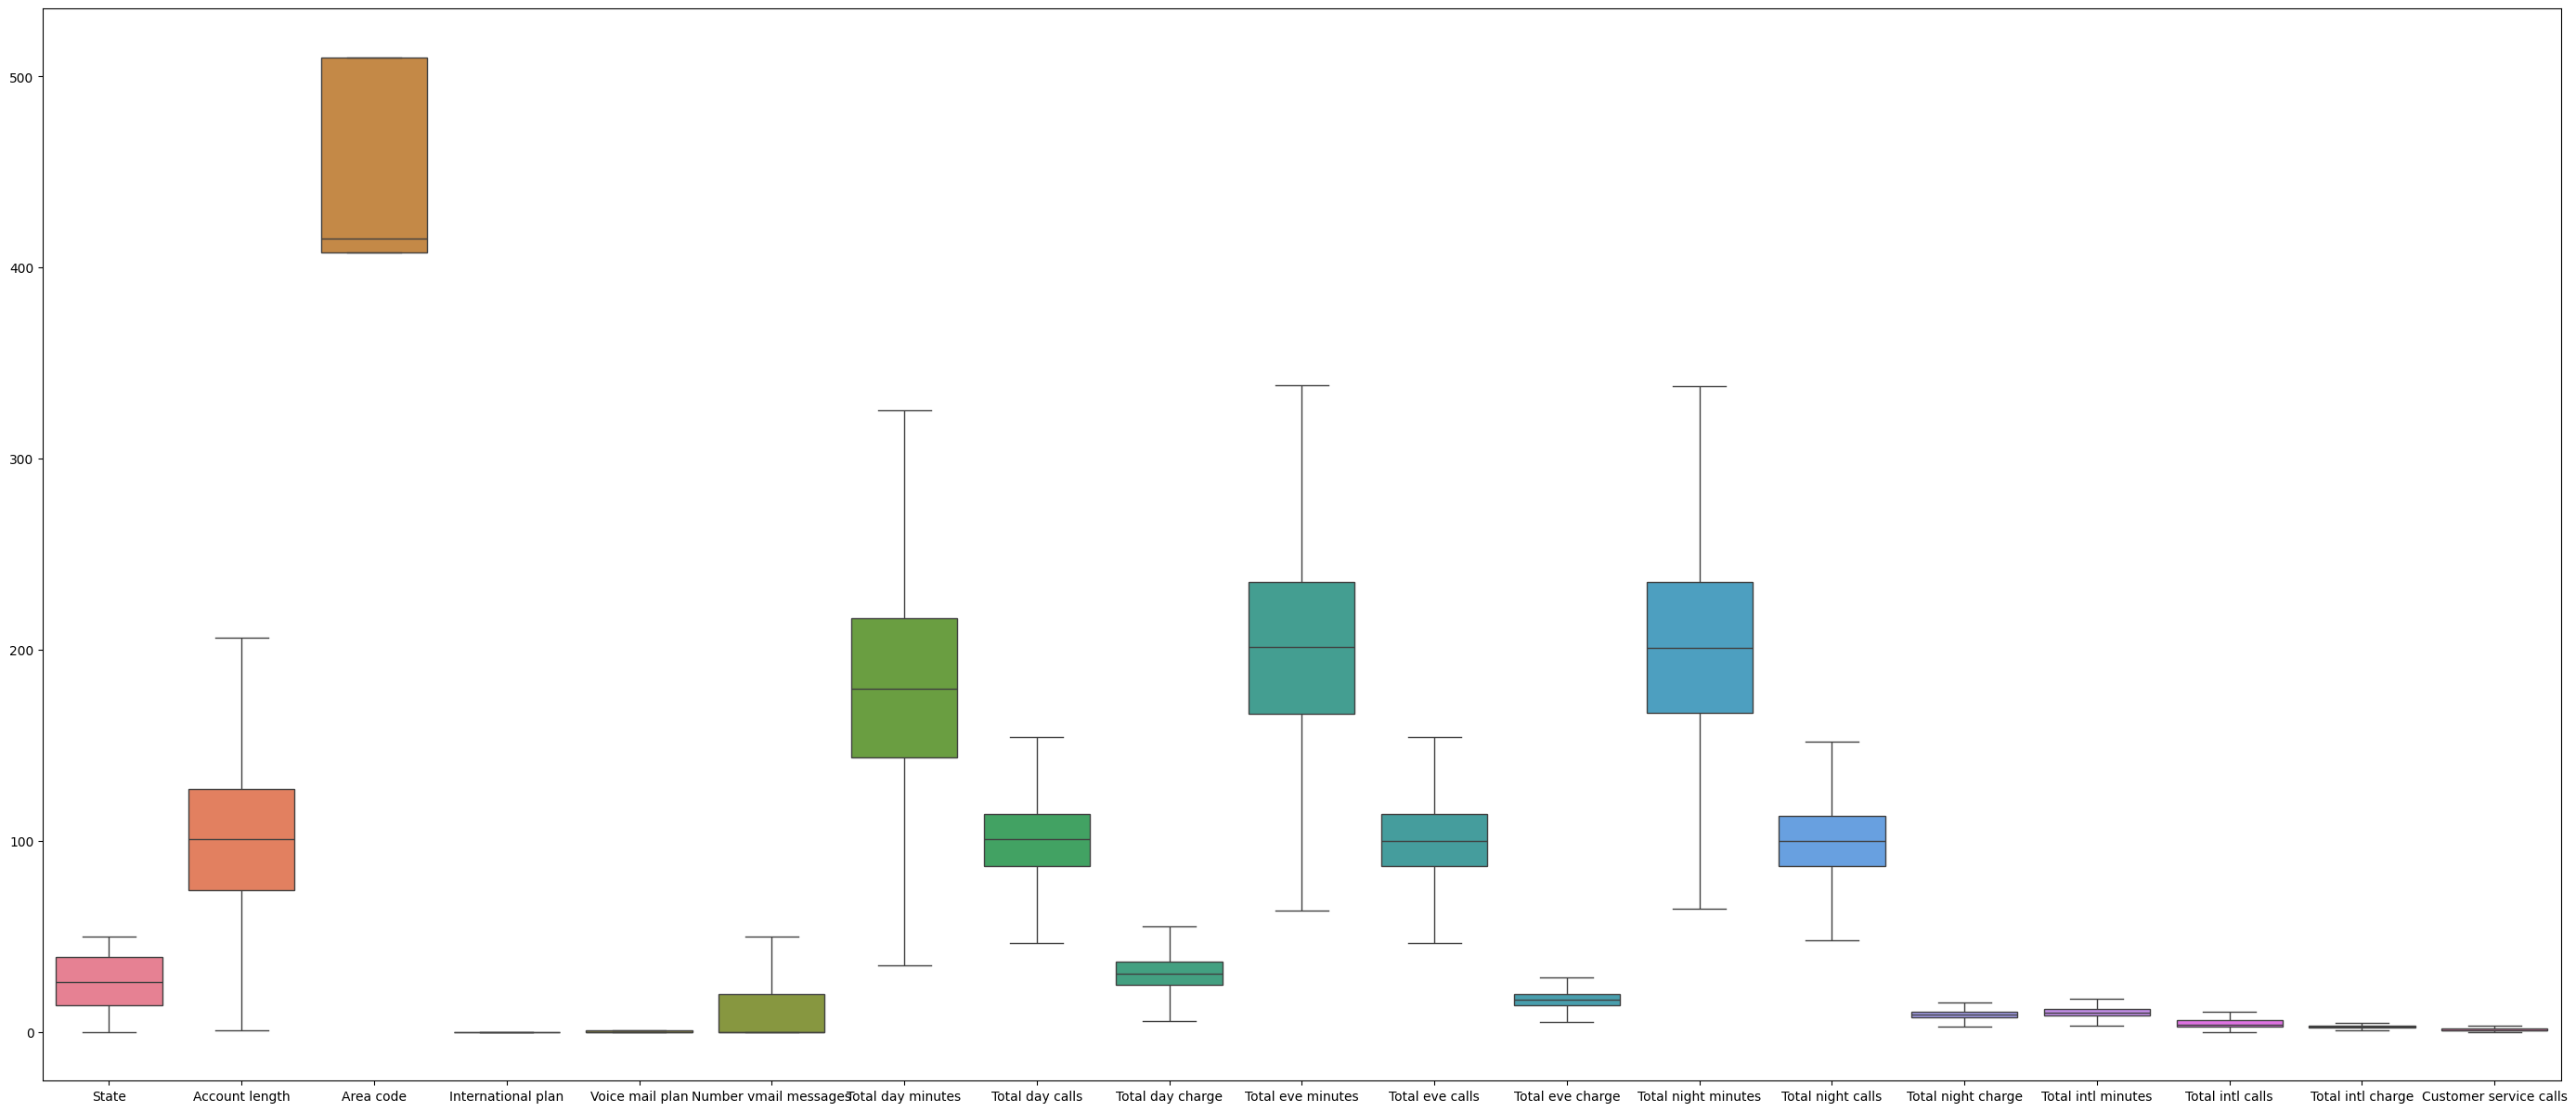

In [32]:
plt.figure(figsize=(35,15))
sns.boxplot(df.iloc[:,:-1])
plt.show();

# Tách dữ liệu

In [33]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state= 15, stratify= y)

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=42)


decision_param_grid = {
    'max_depth':[1,3,5,10,20]
}

start_time = time.time()

dt = GridSearchCV(dt_clf, decision_param_grid, scoring = 'accuracy', cv = 5)
dt.fit(X_train, y_train)

train_time = time.time() - start_time

# In ra siêu tham số tốt nhất
print("Siêu tham số tốt nhất:")
print(dt.best_params_)

# Lấy mô hình tốt nhất từ GridSearchCV
best_bagging = dt.best_estimator_

# Dự đoán trên tập kiểm tra
start_time = time.time()

y_pred_dt = dt.predict(X_test)

predict_time = time.time() - start_time

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Độ chính xác của mô hình Bagging với siêu tham số tốt nhất: {accuracy:.2f}")

# In báo cáo phân loại
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_dt))

# In ra thời gian huấn luyện và dự đoán
print(f"Thời gian huấn luyện: {train_time:.4f} giây")
print(f"Thời gian dự đoán: {predict_time:.4f} giây")


Siêu tham số tốt nhất:
{'max_depth': 5}
Độ chính xác của mô hình Bagging với siêu tham số tốt nhất: 0.91
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       570
           1       0.87      0.47      0.61        97

    accuracy                           0.91       667
   macro avg       0.89      0.73      0.78       667
weighted avg       0.91      0.91      0.90       667

Thời gian huấn luyện: 0.8010 giây
Thời gian dự đoán: 0.0000 giây


In [37]:
# Tính toán cross-validation scores để đánh giá độ lệch và phương sai
cv_scores = cross_val_score(dt, X_train, y_train, cv=5, n_jobs=-1)

# Tính độ lệch (bias) và phương sai (variance)
bias = 1 - np.mean(cv_scores)
variance = np.var(cv_scores)

print(f"Độ lệch của mô hình: {bias:.10f}")
print(f"Phương sai của mô hình: {variance:.10f}")

Độ lệch của mô hình: 0.0858935711
Phương sai của mô hình: 0.0000647829


# Bagging

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Định nghĩa không gian siêu tham số để tìm kiếm
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Sử dụng GridSearchCV để tìm siêu tham số tốt nhất
start_time = time.time()

bg_grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
bg_grid_search.fit(X_train, y_train)

train_time = time.time() - start_time

# In ra siêu tham số tốt nhất
print("Siêu tham số tốt nhất:")
print(bg_grid_search.best_params_)

# Lấy mô hình tốt nhất từ GridSearchCV
best_bagging = bg_grid_search.best_estimator_

# Dự đoán trên tập kiểm tra
start_time = time.time()

y_pred = best_bagging.predict(X_test)

predict_time = time.time() - start_time

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình Bagging với siêu tham số tốt nhất: {accuracy:.2f}")

# In báo cáo phân loại
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))

# In ra thời gian huấn luyện và dự đoán
print(f"Thời gian huấn luyện: {train_time:.4f} giây")
print(f"Thời gian dự đoán: {predict_time:.4f} giây")

Siêu tham số tốt nhất:
{'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Độ chính xác của mô hình Bagging với siêu tham số tốt nhất: 0.92
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       570
           1       0.93      0.52      0.66        97

    accuracy                           0.92       667
   macro avg       0.92      0.75      0.81       667
weighted avg       0.92      0.92      0.91       667

Thời gian huấn luyện: 185.4586 giây
Thời gian dự đoán: 0.0433 giây


In [52]:
# Tính toán cross-validation scores để đánh giá độ lệch và phương sai
cv_scores = cross_val_score(bg_grid_search, X_train, y_train, cv=5, n_jobs=-1)

# Tính độ lệch (bias) và phương sai (variance)
bias = 1 - np.mean(cv_scores)
variance = np.var(cv_scores)

print(f"Độ lệch của mô hình: {bias:.10f}")
print(f"Phương sai của mô hình: {variance:.10f}")

Độ lệch của mô hình: 0.0810218465
Phương sai của mô hình: 0.0000458607


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import math

num_columns = X.shape[1]
# Khởi tạo mô hình Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Định nghĩa phân phối ngẫu nhiên cho các siêu tham số bạn muốn thử
rf_param_dist = {
    'n_estimators': randint(100, 1000), 
    'max_depth': range(3,10), 
    'max_features': [round(math.sqrt(num_columns))]
}

# Sử dụng GridSearchCV để tìm siêu tham số tốt nhất
start_time = time.time()

rf_random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=rf_param_dist, cv=5,random_state = 42)
rf_random_search.fit(X_train, y_train)

train_time = time.time() - start_time

# In ra siêu tham số tốt nhất
print("Siêu tham số tốt nhất:")
print(rf_random_search.best_params_)

# Lấy mô hình tốt nhất từ GridSearchCV
best_df = rf_random_search.best_estimator_

# Dự đoán trên tập kiểm tra
start_time = time.time()

y_pred_rf = rf_random_search.predict(X_test)

predict_time = time.time() - start_time

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Độ chính xác của mô hình Bagging với siêu tham số tốt nhất: {accuracy:.2f}")

# In báo cáo phân loại
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_rf))

# In ra thời gian huấn luyện và dự đoán
print(f"Thời gian huấn luyện: {train_time:.4f} giây")
print(f"Thời gian dự đoán: {predict_time:.4f} giây")

Siêu tham số tốt nhất:
{'max_depth': 9, 'max_features': 4, 'n_estimators': 535}
Độ chính xác của mô hình Bagging với siêu tham số tốt nhất: 0.92
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       570
           1       0.94      0.51      0.66        97

    accuracy                           0.92       667
   macro avg       0.93      0.75      0.81       667
weighted avg       0.92      0.92      0.91       667

Thời gian huấn luyện: 87.4652 giây
Thời gian dự đoán: 0.0398 giây


In [40]:
# Tính toán cross-validation scores để đánh giá độ lệch và phương sai
cv_scores = cross_val_score(rf_random_search, X_train, y_train, cv=5, n_jobs=-1)

# Tính độ lệch (bias) và phương sai (variance)
bias = 1 - np.mean(cv_scores)
variance = np.var(cv_scores)

print(f"Độ lệch của mô hình: {bias:.10f}")
print(f"Phương sai của mô hình: {variance:.10f}")

Độ lệch của mô hình: 0.0840230200
Phương sai của mô hình: 0.0000952134


In [44]:
rf = RandomForestClassifier(max_depth=9, max_features=4, n_estimators=535,  random_state = 42)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=9, max_features=4, n_estimators=535,
                       random_state=42)

Total day minutes         0.175311
Total day charge          0.174877
Customer service calls    0.132135
Total eve minutes         0.072011
Total eve charge          0.071889
Number vmail messages     0.037663
Total night minutes       0.037404
Total night charge        0.036212
Total intl minutes        0.034969
Total intl charge         0.034623
Total night calls         0.029959
Total day calls           0.029365
Account length            0.027939
Total eve calls           0.025900
Voice mail plan           0.025532
State                     0.023480
Total intl calls          0.023130
Area code                 0.007600
International plan        0.000000
dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


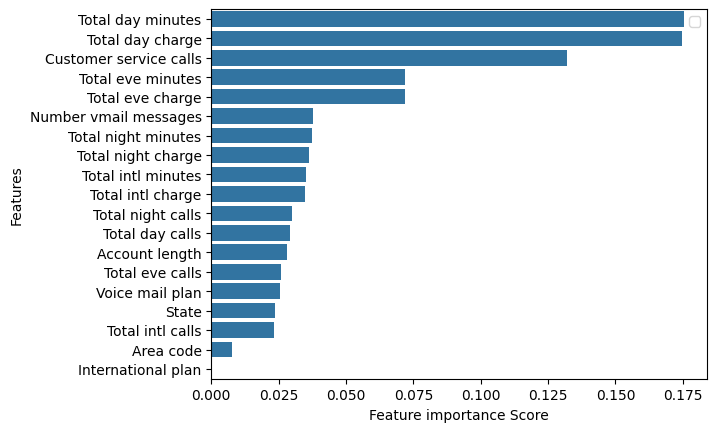

In [45]:
feature_imp = pd.Series(rf.feature_importances_, index=df.columns.values[:-1]).sort_values(ascending=False)

# In ra danh sách đặc trưng quan trọng
print(feature_imp)

sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Feature importance Score")
plt.ylabel("Features")
plt.legend()
plt.show()

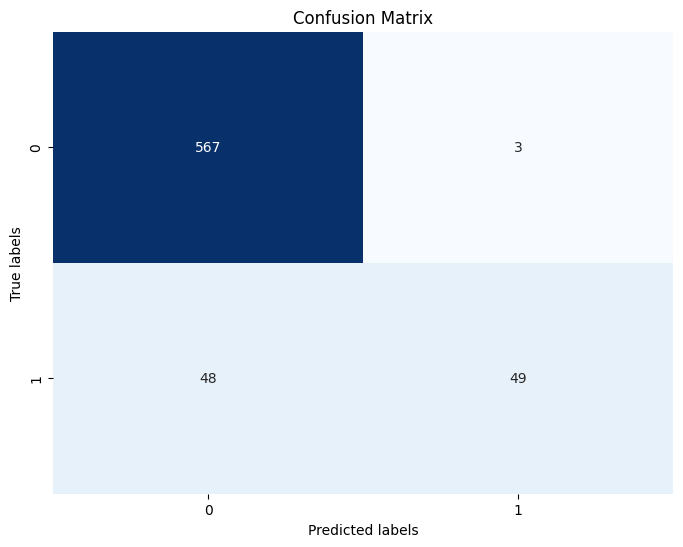

In [46]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, y_pred):
    # Tính ma trận nhầm lẫn
    cm = confusion_matrix(Y_test, y_pred_rf)

    # Tạo heatmap từ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Vẽ ma trận nhầm lẫn
plot_confusion_matrix(y_test, y_pred_rf)

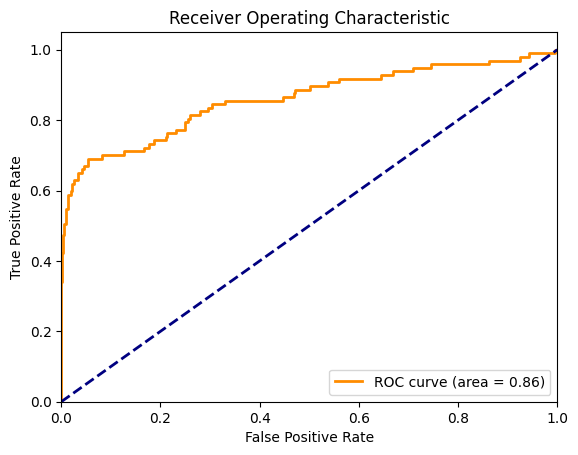

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probabilities for each class
y_probs = rf_random_search.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [48]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()

kn_param_grid = {
    'n_neighbors' : range(1,20),
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

# Sử dụng GridSearchCV để tìm siêu tham số tốt nhất
start_time = time.time()

knn = GridSearchCV(estimator=kn_clf, param_grid=kn_param_grid, scoring='accuracy', cv = 5)
knn.fit(X_train, y_train)

train_time = time.time() - start_time

# In ra siêu tham số tốt nhất
print("Siêu tham số tốt nhất:")
print(knn.best_params_)

# Lấy mô hình tốt nhất từ GridSearchCV
best_knn = knn.best_estimator_

# Dự đoán trên tập kiểm tra
start_time = time.time()

y_pred_knn = knn.predict(X_test)

predict_time = time.time() - start_time

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Độ chính xác của mô hình Bagging với siêu tham số tốt nhất: {accuracy:.2f}")

# In báo cáo phân loại
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_knn))

# In ra thời gian huấn luyện và dự đoán
print(f"Thời gian huấn luyện: {train_time:.4f} giây")
print(f"Thời gian dự đoán: {predict_time:.4f} giây")

c:\Users\Lechh\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Lechh\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Lechh\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lechh\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

Siêu tham số tốt nhất:
{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Độ chính xác của mô hình Bagging với siêu tham số tốt nhất: 0.88
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       570
           1       0.83      0.25      0.38        97

    accuracy                           0.88       667
   macro avg       0.86      0.62      0.66       667
weighted avg       0.88      0.88      0.85       667

Thời gian huấn luyện: 8.4066 giây
Thời gian dự đoán: 0.0873 giây


In [49]:
# Tính toán cross-validation scores để đánh giá độ lệch và phương sai
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, n_jobs=-1)

# Tính độ lệch (bias) và phương sai (variance)
bias = 1 - np.mean(cv_scores)
variance = np.var(cv_scores)

print(f"Độ lệch của mô hình: {bias:.10f}")
print(f"Phương sai của mô hình: {variance:.10f}")

Độ lệch của mô hình: 0.1230284377
Phương sai của mô hình: 0.0000269878


In [50]:
from sklearn.linear_model import LogisticRegression

lgt_clf = LogisticRegression(random_state=42)

lg_param_grid = {
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],
    'C': [0.01, 0.1, 1, 10, 100]
}
# Sử dụng GridSearchCV để tìm siêu tham số tốt nhất
start_time = time.time()

lg = GridSearchCV(estimator=lgt_clf, param_grid=lg_param_grid)
lg.fit(X_train, y_train)

train_time = time.time() - start_time

# In ra siêu tham số tốt nhất
print("Siêu tham số tốt nhất:")
print(lg.best_params_)

# Lấy mô hình tốt nhất từ GridSearchCV
best_lg = lg.best_estimator_

# Dự đoán trên tập kiểm tra
start_time = time.time()

y_pred_lg = lg.predict(X_test)

predict_time = time.time() - start_time

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred_lg)
print(f"Độ chính xác của mô hình Bagging với siêu tham số tốt nhất: {accuracy:.2f}")

# In báo cáo phân loại
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_lg))

# In ra thời gian huấn luyện và dự đoán
print(f"Thời gian huấn luyện: {train_time:.4f} giây")
print(f"Thời gian dự đoán: {predict_time:.4f} giây")

Siêu tham số tốt nhất:
{'C': 10, 'solver': 'newton-cg'}
Độ chính xác của mô hình Bagging với siêu tham số tốt nhất: 0.87
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       570
           1       0.83      0.10      0.18        97

    accuracy                           0.87       667
   macro avg       0.85      0.55      0.56       667
weighted avg       0.86      0.87      0.82       667

Thời gian huấn luyện: 0.7417 giây
Thời gian dự đoán: 0.0000 giây


In [51]:
# Tính toán cross-validation scores để đánh giá độ lệch và phương sai
cv_scores = cross_val_score(lg, X_train, y_train, cv=5, n_jobs=-1)

# Tính độ lệch (bias) và phương sai (variance)
bias = 1 - np.mean(cv_scores)
variance = np.var(cv_scores)

print(f"Độ lệch của mô hình: {bias:.10f}")
print(f"Phương sai của mô hình: {variance:.10f}")

Độ lệch của mô hình: 0.1369093043
Phương sai của mô hình: 0.0000042346
